In [1]:
using Plots, JuMP, Optim, GLPK, Ipopt, MathOptInterface

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1664
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for LogExpFunctions [2ab3a3ac-af41-5b50-aa03-7779005ae688]
│   exception = Required dependency DocStringExtensions [ffbed154-4ef7-542d-bbb7-c09d3a79fcae] failed to load from a cache file.
└ @ Base loading.jl:1349
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for ColorVectorSpace [c3611d14-8923-5661-9e6a-0046d554d3a4]
│   exception = Required dependency LogExpFunctions [2ab3a3ac-af41-5b50-aa03-7779005ae688] failed to load from a cache file.
└ @ Base loading.jl:1349
Internal error: encountered unexpected error in runtime:
MethodError(f=Core.Compiler.widenconst, args=(Symbol("/home/addoune/.julia/packages/FixedPointNumbers/HAGk2/src/normed.jl"),), world=0x0000000000001342)
jl_method_error_bare at /cache/build/default-amdci5-6/julialang/julia-release-1-dot-8/src/gf.c:1877
jl_met

LoadError: Failed to precompile Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] to /home/addoune/.julia/compiled/v1.8/Plots/jl_GCdqh1.

In [2]:
# Règle d'Armijo 
function armijo(f, ∇f, g, x, d, c, itermax=50)
    α = 2
    i = 1
    ρ = .95
    
    while i < itermax
       if (f(x+α*d) <= f(x) + c*α*∇f'*d) & (all(g(x+α*d) .<= 
                    zeros(length(g(x)))))
            return α
        end
        α = ρ*α
        i = i+1
    end
    return nothing
end

armijo (generic function with 2 methods)

On se propose de résoudre le problème suivant

\begin{equation}
\begin{array}{l}
\text{Minimiser }\, 2x_1^2+2x_2^2-2x_1x_2-4x_1-6x_2\\[1mm]
\text{s.c}\\
x_1+5x_2\leqslant 5\\
2x_1^2-x_2\leqslant 0\\
x_1,x_2\geqslant 0.
\end{array}
\end{equation}

In [9]:
f(x) = 2x[1]^2+2x[2]^2-2x[1]*x[2]-4x[1]-6x[2]
#f(x,y) = 2x^2+2y^2-2x*y-4x-6y
# la fonction x -> df(x) définie de R^2 dans R^4
df(x) = [4x[1]-2x[2]-4, 4x[2]-2x[1]-6]
g(x) = [x[1]+5x[2]-5, 2x[1]^2-x[2], -x[1], -x[2]]
dg(x) = [1 5; 4x[1] -1; -1 0; 0 -1]

dg (generic function with 1 method)

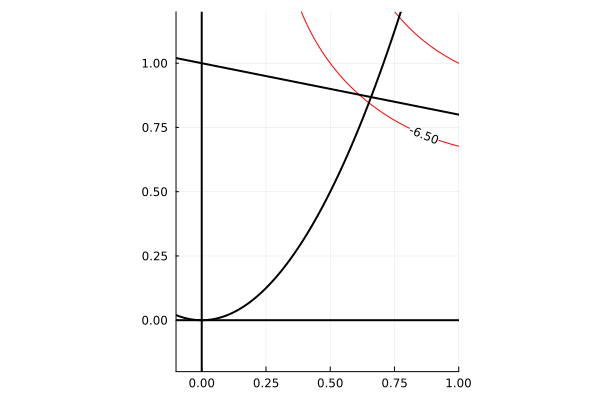

In [232]:
nx = 200
ny = 200
xx = range(-0.1,1, length=nx)
yy = range(-.5,1.2, length=ny)
#ff = zeros(nx, ny)
ff(x,y) = 2x^2+2y^2-2x*y-4x-6y
gg = [(x,y)->x+5y-5, (x,y) -> 2x^2-y, (x,y) -> -x, (x,y) -> -y]

contour(xx, yy, ff, levels = [-8.77,-8, -6.5], color="red", 
    aspect_ratio=:equal, xlims=(-.1,1), ylims=(-.2,1.2), colorbar = false, contour_labels=true)

# contour!(xx,yy,gg[1], levels=[0], color="black", linewidth=2 )
# contour!(xx,yy,gg[2], levels=[0], color="black", linewidth=2 )
# contour!(xx,yy,gg[3], levels=[0], color="black", linewidth=2 )
# contour!(xx,yy,gg[4], levels=[0], color="black", linewidth=2 )

for i in 1:4
    contour!(xx,yy,gg[i], levels=[0], color="black", linewidth=2 )
end
current() # nécessaire pour afficher le dessin après une boucle

In [10]:
savefig("out.pdf")

In [95]:
modele = Model(Ipopt.Optimizer)
set_silent(modele)

# définition des variables
@variable(modele, x[1:2])

# définition de la fonction objectif
@NLobjective(modele, Min, 2x[1]^2+2x[2]^2-2x[1]*x[2]-4x[1]-6x[2])

# définition des contraintes

@constraint(modele, x[1]+5x[2]-5 <= 0 )
@NLconstraint(modele, 2x[1]^2-x[2] <= 0)

print(modele)
# résolution du problème
optimize!(modele);

#affichage de la valeur optimale
@show objective_value(modele)

#affichage de la solution
println("solution = $(value.(x))")

objective_value(modele) = -6.613085517229477
solution = [0.6588723497256455, 0.8682255395178552]


In [145]:
linearModel = Model(GLPK.Optimizer)
@variable(linearModel, -1 .<=d[1:2] .<=1)
@variable(linearModel, z)
@objective(linearModel, Min, z)
# set_objective_sense(linearModel, MathOptInterface.MIN_SENSE)
ϵ = 0.1
iter = 0

0

In [146]:
x = [0.0,0.0]
liste_iteres = [x]

1-element Vector{Vector{Float64}}:
 [0.0, 0.0]

In [211]:
iter = iter + 1
@show iter
ind = findall(abs.(g(x)) .<= ϵ)

iter = 9


2-element Vector{Int64}:
 1
 2

In [212]:
@constraint(linearModel, conf, df(x)'*d <= z)

@constraint(linearModel, con, dg(x)[ind, :]*d .<= z)

2-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}}:
 con : d[1] + 5 d[2] - z ≤ 0.0
 con : 2.537700817439905 d[1] - d[2] - z ≤ 0.0

In [213]:
print(linearModel)

In [214]:
optimize!(linearModel)

In [215]:
value.(d), value(z)

([-1.1102230246251565e-16, 0.0], -3.1380677343629147e-16)

In [216]:
α = armijo(f, df(x), g, x, value.(d), .5, 200)
println("α = $α")

α = 2


In [217]:
x = x+α*value.(d) 
println("z = $(value(z))")
@show x 
append!(liste_iteres, [x])
unregister(linearModel,:conf)
delete(linearModel, conf)
unregister(linearModel, :con)
delete(linearModel, con)

z = -3.1380677343629147e-16
x = [0.6344252043599761, 0.8725029319685315]


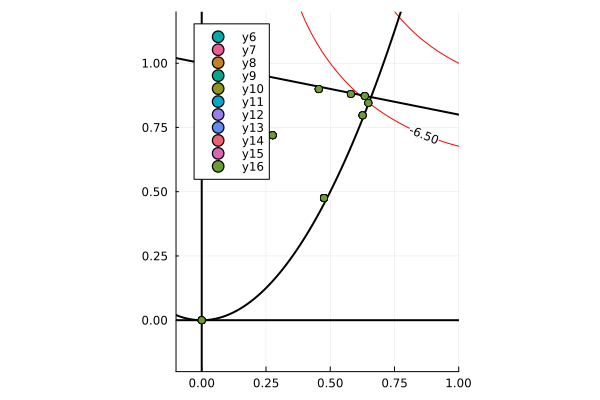

In [218]:
scatter!([liste_iteres[i][1] for i in 1:length(liste_iteres)], [liste_iteres[i][2] for i in 1:length(liste_iteres
        )])

In [219]:
liste_iteres

10-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [0.4756537705106642, 0.4756537705106642]
 [0.2759930202468466, 0.71982686798436]
 [0.4554826841085481, 0.8993165318460615]
 [0.6259978647771645, 0.7972436432457158]
 [0.5804693766497974, 0.8803996304171641]
 [0.6482004479258617, 0.8455991806531645]
 [0.6344252043599758, 0.8725029319685315]
 [0.6344252043599763, 0.8725029319685315]
 [0.6344252043599761, 0.8725029319685315]

norm(liste_iteres[end-1]-value.(x))